# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [2]:
df = pd.read_csv('data/hw2data.csv')
df = pd.DataFrame(df)

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [3]:
y = df['y'].copy()
X = df.drop('y',1).copy()

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


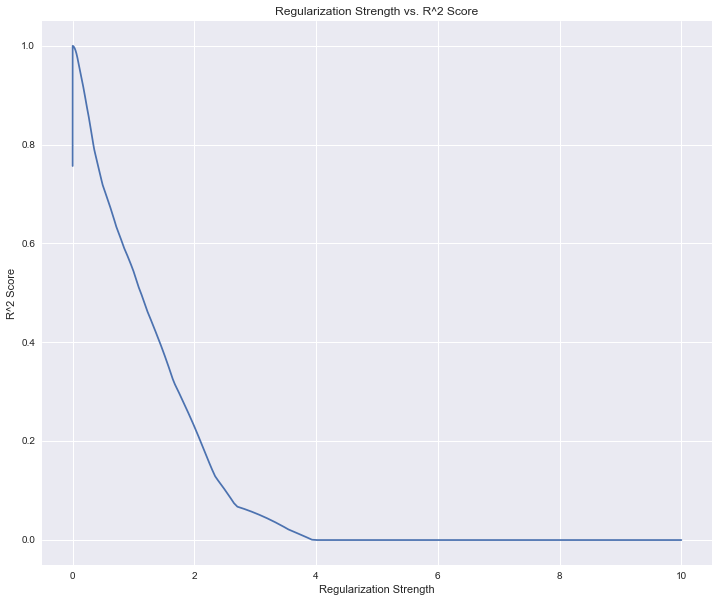

In [4]:
#l1 = LASSO and l2 = ridge
size = len(df)

X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

scores = []
alphas = np.logspace(-8,1,1000)
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
plt.figure(figsize=(12,10))
plt.title('Regularization Strength vs. R^2 Score')
plt.xlabel('Regularization Strength')
plt.ylabel('R^2 Score')
plt.plot(alphas,scores)

In [5]:
best_alpha = np.argmax(scores)
# regularization score that optimizes R^2
print("Regularization strength to optimize R^2: %",alphas[best_alpha])

Regularization strength to optimize R^2: % 0.000763629826128


d) Plot the training perforamnce versus the testing performance, and observe where the test performance is
maximized. I've written an outline of the code you need.

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


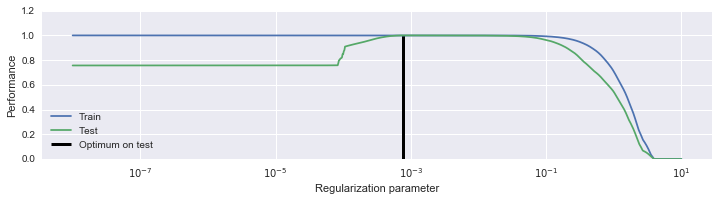

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)

# Fill these in
alphas = np.logspace(-8,1,1000)

train_errors = list()
test_errors = list()
for alpha in alphas:
#   enet = LogisticRegression(C=alpha,penalty='l2')
    enet = Lasso(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))
    

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()


The test performance is maximized when the regularization parameter reaches the value we calculated earlier. 

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

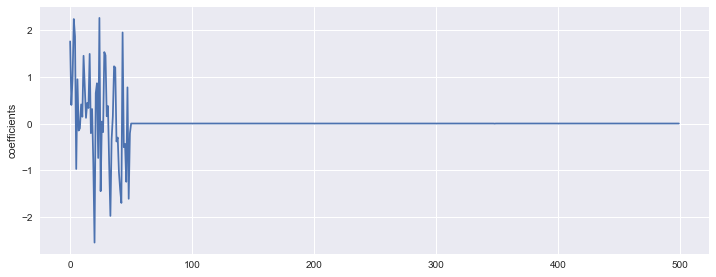

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
regr = Lasso(alpha = alpha_optim)
regr.fit(X_train, y_train)
coeffs = regr.coef_
plt.ylabel('coefficients')
plt.plot(coeffs)

There are many zeros because of the way the level sets are formed--we can think of the shape of the LASSO constraint as corresponding to a diamond and when the sum of squares touches the corners, the corresponding coefficents shrink to zero. As the number of dimensions increases, there are more corners, and the chances of a coefficient shrinking to zero increases. Thus, the solution contains many zeros.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


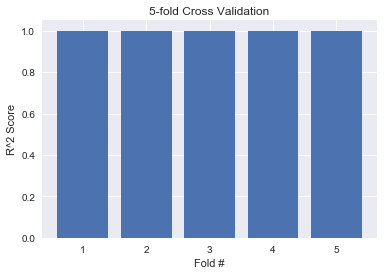

[ 0.99926808  0.99996825  0.99999801  0.99999465  0.99999321]


C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


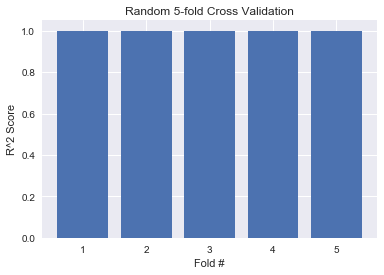

[ 0.99999866  0.99740293  0.99889452  0.99999732  0.99997783]


In [8]:
regr = Lasso(alpha=alpha_optim)
scores = cross_val_score(regr, X, y, cv=5)
plt.bar(range(1,6),scores)
plt.xlabel('Fold #')
plt.ylabel('R^2 Score')
plt.title('5-fold Cross Validation')
plt.show()
print(scores)

# random cross validation
from sklearn.model_selection import KFold
shuffle = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(regr, X, y, cv=shuffle)
plt.bar(range(1,6),scores)
plt.xlabel('Fold #')
plt.ylabel('R^2 Score')
plt.title('Random 5-fold Cross Validation')
plt.show()
print(scores)

The model does indeed work well on all the random subsets, as the R^2 scores are quite close to 1 each time, for both the non-shuffled cross validation and the shuffled one. 

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [9]:
alpha_best = alpha_optim
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_best)

C:\Users\Jason\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [10]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


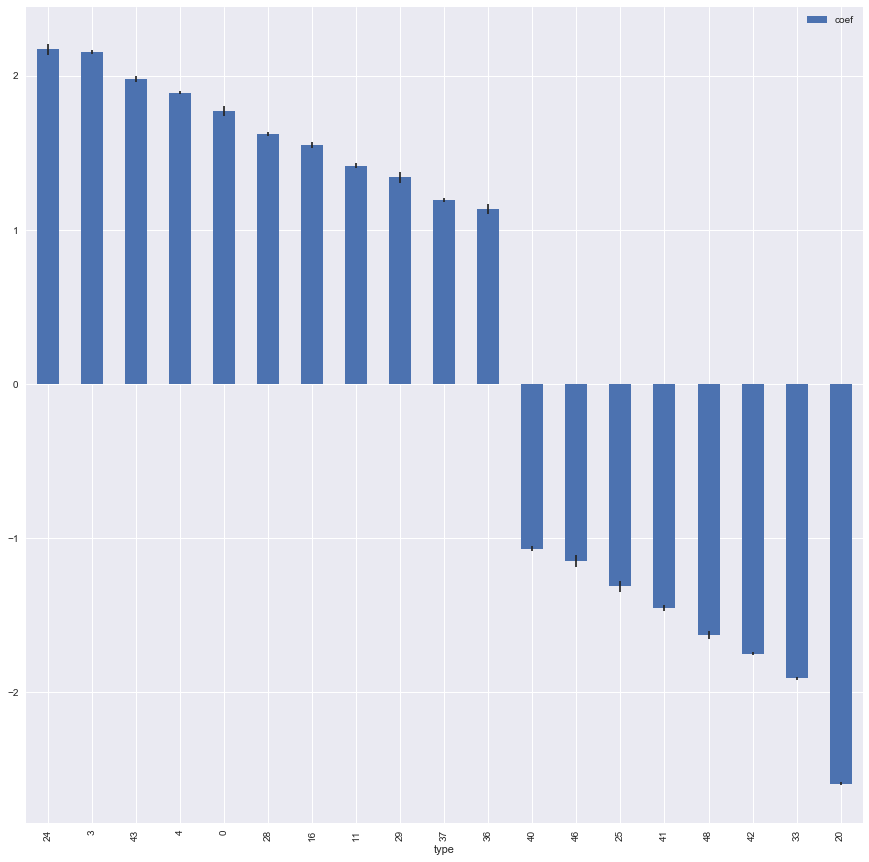

In [11]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))